<a href="https://colab.research.google.com/github/Sehar326/Sehar/blob/main/Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("email_spam.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df.sample(5)

,Category,Message
157,ham,I'm leaving my house now...
3637,ham,ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOUT...
3346,ham,Reverse is cheating. That is not mathematics.
1286,ham,"Just wondering, the others just took off"
3051,ham,Ok


In [ ]:
df.shape

(5572, 2)

In [ ]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evolution
# 6. Improvement
# 7. Website
# 8. Deploy

# **1. Data cleaning**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Category']=encoder.fit_transform(df['Category'])


In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Check for missing values
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
#Check for duplicate values
df.duplicated().sum()

np.int64(415)

In [ ]:
#Remove duplicate values
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5157, 2)

# **2.EDA**

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641


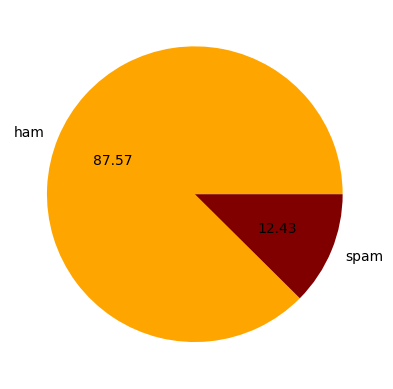

In [ ]:
import matplotlib.pyplot as plt
colors = ['orange', 'maroon']
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f",colors=colors)
#For remove extra piece of code
plt.show()

In [ ]:
 #Data is imbalanced

In [ ]:
!pip install nltk

In [ ]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
df['num_char']=df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')
df['num_word']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df.head()

,Category,Message,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sen']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_char,num_word,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df['num_sen']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df[['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['Category']==0][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Spam
df[df['Category']==1][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

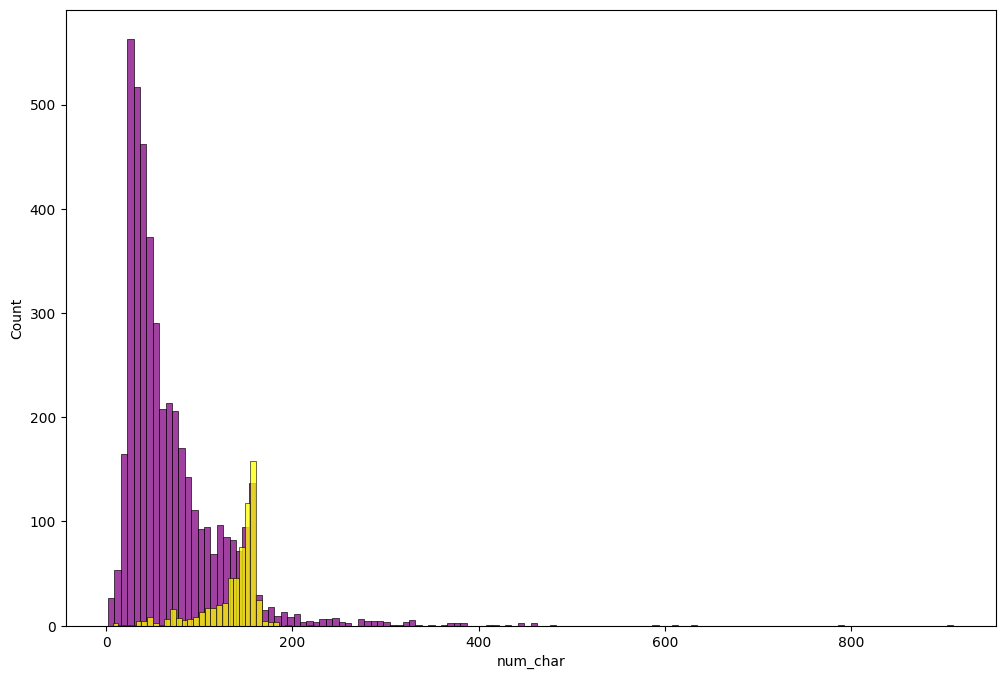

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Category']==0]['num_char'],color='purple')
sns.histplot(df[df['Category']==1]['num_char'],color='yellow')

<Axes: xlabel='num_word', ylabel='Count'>

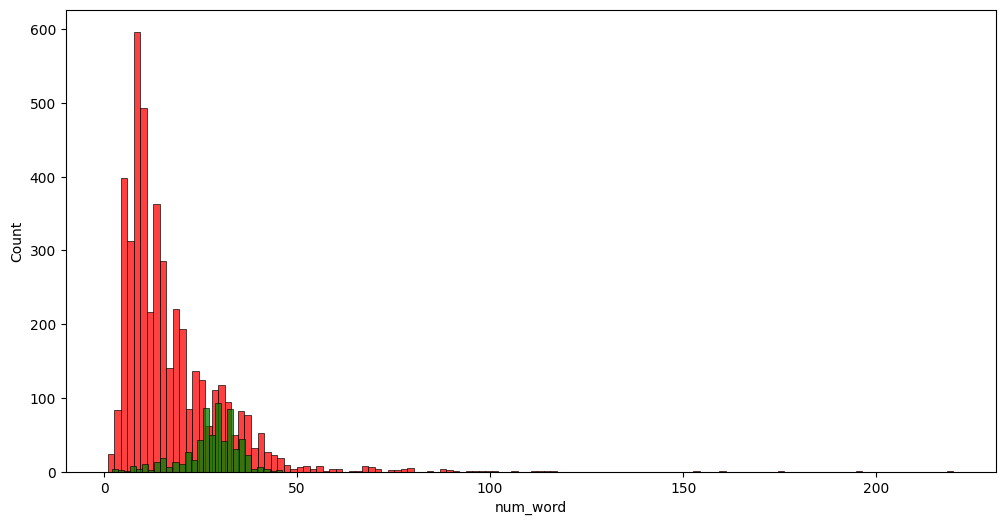

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_word'],color='red')
sns.histplot(df[df['Category']==1]['num_word'],color='green')

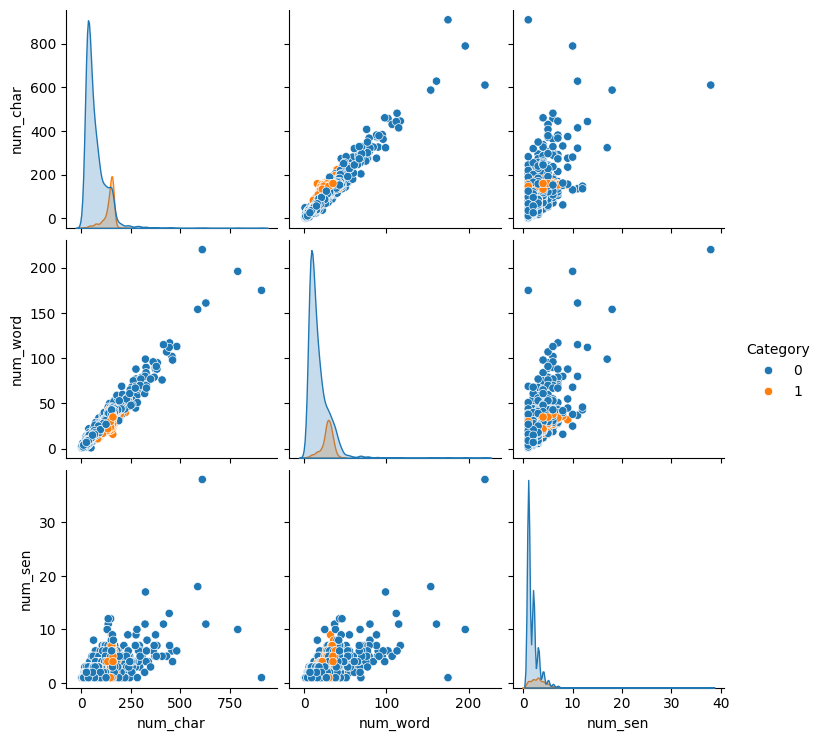

In [ ]:
sns.pairplot(df,hue='Category')

<Axes: >

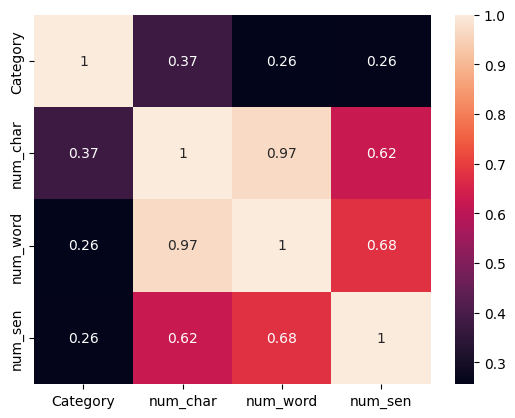

In [ ]:
sns.heatmap(df[['Category','num_char','num_word','num_sen']].corr(),annot=True)

# **3.Data PreProcessing**
lower Case
Tokenization
Rmoving Special chararters
Removing stop word and puntuuation
Stemming

In [ ]:
def tranfrom_message(Message):
  text=Message.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
      if i.isalnum():
          y.append(i)
  text= y[:]
  y.clear()


  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
  text= y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))
  return " ".join(y)

In [ ]:

ps.stem('dancing')
ps.stem('loving')
#for convert loving to root like love

'love'

In [ ]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
def transform_message(text):
    return text

transform_message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
df['transform_message'] = df['Message'].apply(transform_message)
df.head()

,Category,Message,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.head()

,Category,Message,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['Category']==1]['transform_message'].str.cat(sep=" "))

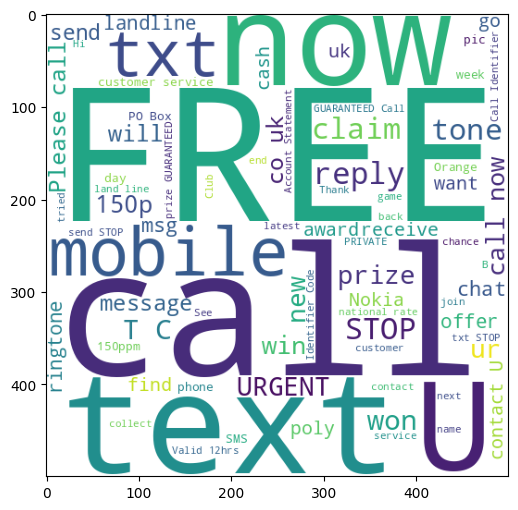

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['Category']==0]['transform_message'].str.cat(sep=" "))

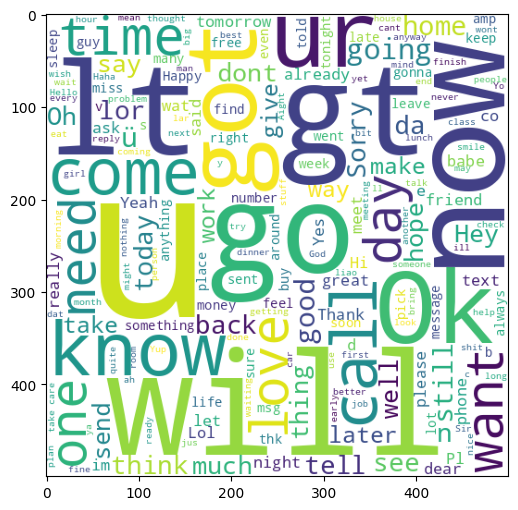

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,Category,Message,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transform_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

15166

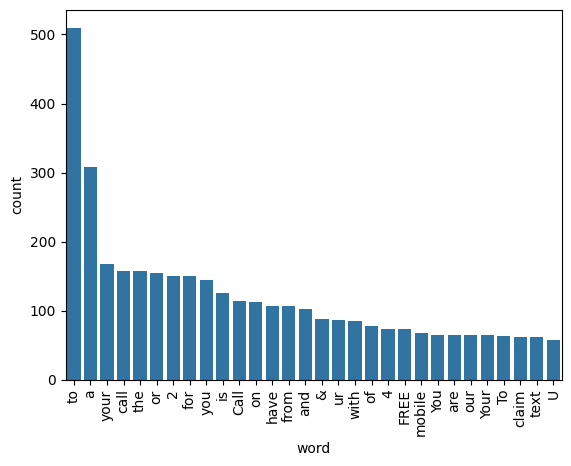

In [ ]:
from collections import Counter
spam_words_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_words_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transform_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

64307

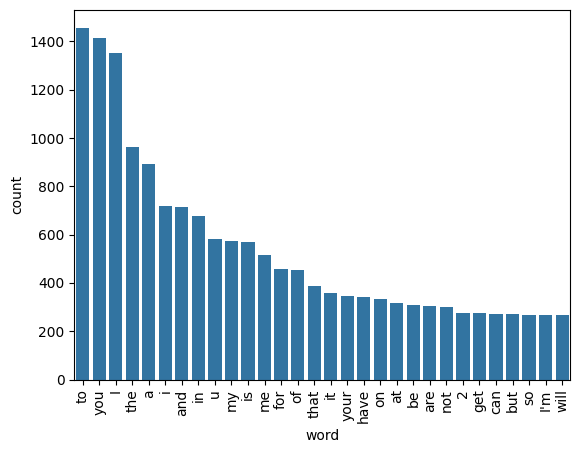

In [ ]:
ham_words_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_words_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Category,Message,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


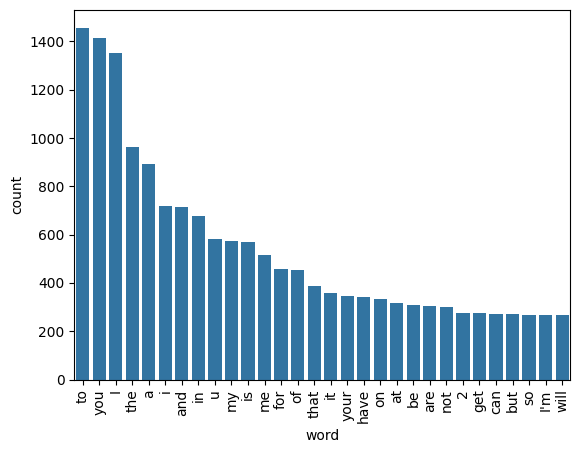

In [ ]:
from collections import Counter
import pandas as pd
spamm_wordss_countss=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])
sns.barplot(x='word',y='count',data=spamm_wordss_countss)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Category,Message,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


# **4.Model building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfid.fit_transform(df['transform_message']).toarray()

In [ ]:
X.shape

(5157, 3000)

In [ ]:
Y=df['Category'].values

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(Y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred1))
print("Precision:", precision_score(Y_test, y_pred1))
print()

Gaussian Naive Bayes:
Accuracy: 0.8934108527131783
Confusion Matrix:
 [[808  97]
 [ 13 114]]
Precision: 0.5402843601895735



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(Y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred2))
print("Precision:", precision_score(Y_test, y_pred2))
print()

Multinomial Naive Bayes:
Accuracy: 0.9777131782945736
Confusion Matrix:
 [[905   0]
 [ 23 104]]
Precision: 1.0



In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(Y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred3))
print("Precision:", precision_score(Y_test, y_pred3))
print()

Bernoulli Naive Bayes:
Accuracy: 0.9854651162790697
Confusion Matrix:
 [[904   1]
 [ 14 113]]
Precision: 0.9912280701754386



In [ ]:
#tfidf----> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [ ]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)


(0.9806201550387597, 0.9819819819819819)

In [ ]:
model_accuracy_scores = []
model_precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, X_train, Y_train, X_test, Y_test
    )

    print('For', name)
    print('Accuracy:', current_accuracy)
    print('Precision:', current_precision)
    print()

    model_accuracy_scores.append(current_accuracy)
    model_precision_scores.append(current_precision)

For SVC
Accuracy: 0.9806201550387597
Precision: 0.9819819819819819

For KN
Accuracy: 0.9098837209302325
Precision: 1.0

For NB
Accuracy: 0.9777131782945736
Precision: 1.0

For DT
Accuracy: 0.9515503875968992
Precision: 0.8969072164948454

For LR
Accuracy: 0.9544573643410853
Precision: 0.9081632653061225

For RF
Accuracy: 0.9767441860465116
Precision: 1.0

For AdaBoost
Accuracy: 0.9467054263565892
Precision: 0.9285714285714286

For BgC
Accuracy: 0.9699612403100775
Precision: 0.9444444444444444

For ETC
Accuracy: 0.9796511627906976
Precision: 1.0

For GBDT
Accuracy: 0.9573643410852714
Precision: 0.9560439560439561

For xgb
Accuracy: 0.9728682170542635
Precision: 0.9714285714285714



In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': model_accuracy_scores,
    'Precision': model_precision_scores
}).sort_values('Precision', ascending=False)

In [ ]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.909884,1.000000
2,NB,0.977713,1.000000
5,RF,0.976744,1.000000
8,ETC,0.979651,1.000000
0,SVC,0.980620,0.981982
10,xgb,0.972868,0.971429
9,GBDT,0.957364,0.956044
7,BgC,0.969961,0.944444
6,AdaBoost,0.946705,0.928571
4,LR,0.954457,0.908163


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909884
1,NB,Accuracy,0.977713
2,RF,Accuracy,0.976744
3,ETC,Accuracy,0.979651
4,SVC,Accuracy,0.980620
5,xgb,Accuracy,0.972868
6,GBDT,Accuracy,0.957364
7,BgC,Accuracy,0.969961
8,AdaBoost,Accuracy,0.946705
9,LR,Accuracy,0.954457


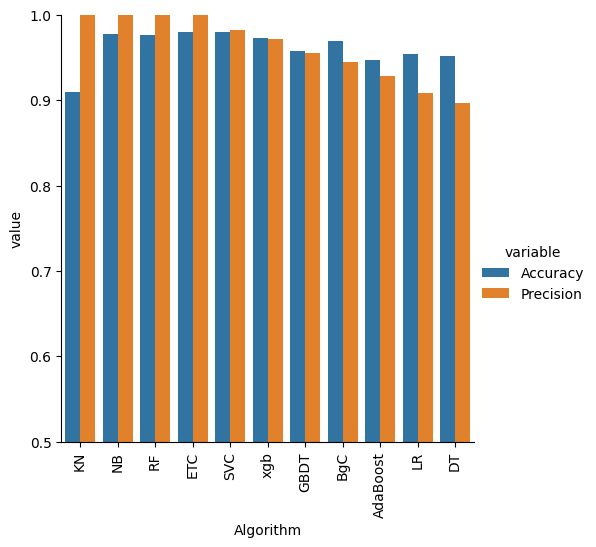

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Model improve

In [ ]:
temp_df=performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': model_accuracy_scores,
    'Precision_max_ft_3000': model_precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

In [ ]:
temp_df=performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': model_accuracy_scores,
    'Precision_scaling': model_precision_scores
}).sort_values('Precision_scaling', ascending=False)

In [ ]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled

,Algorithm,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,KN,0.909884,1.000000,0.909884,1.000000,0.909884,1.000000
1,NB,0.977713,1.000000,0.977713,1.000000,0.977713,1.000000
2,RF,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000
3,ETC,0.979651,1.000000,0.979651,1.000000,0.979651,1.000000
4,SVC,0.980620,0.981982,0.980620,0.981982,0.980620,0.981982
5,xgb,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429
6,GBDT,0.957364,0.956044,0.957364,0.956044,0.957364,0.956044
7,BgC,0.969961,0.944444,0.969961,0.944444,0.969961,0.944444
8,AdaBoost,0.946705,0.928571,0.946705,0.928571,0.946705,0.928571
9,LR,0.954457,0.908163,0.954457,0.908163,0.954457,0.908163


In [ ]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
VotingClassifier(estimators=[('svm',SVC(gamma=1.0, kernel='sigmoid',probability=True)),('nb',MultinomialNB()),('et',ExtraTreesClassifier(n_estimators=50, random_state=2))],voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

voting.fit(X_train,Y_train)

y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(Y_test,y_pred))
print('Precision',precision_score(Y_test,y_pred))

Accuracy 0.9854651162790697
Precision 1.0


In [ ]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimators=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimators)


In [ ]:
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(Y_test,y_pred))
print('Precision',precision_score(Y_test,y_pred))

Accuracy 0.9864341085271318
Precision 0.9829059829059829


In [ ]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))